In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

## Load Unsampled All Data Generated by Data Preprocessing

In [2]:
all_data = np.loadtxt('./preprocessed_data/unsampled_all_data.csv', delimiter=',')

In [3]:
print(all_data.shape)

(217656, 259)


In [4]:
print(np.where(all_data[:,-1]==0)[0].shape)

(108828,)


In [5]:
cond = np.unique(all_data[:,-1])

In [6]:
mlii = all_data[all_data[:,-1]==cond[0]]

In [7]:
v125 = all_data[all_data[:,-1]==cond[1]]

In [8]:
if not os.path.exists('./channel_split/'):
    os.makedirs('./channel_split/')
mlii_file = './channel_split/mlii.csv'
v125_file = './channel_split/v125.csv'

with open(mlii_file, 'wb') as f:
    np.savetxt(f, mlii, delimiter=",", fmt='%f')

with open(v125_file, 'wb') as f:
    np.savetxt(f, v125, delimiter=",", fmt='%f')


In [9]:
mlii=np.loadtxt('./channel_split/mlii.csv', delimiter=',')
v125=np.loadtxt('./channel_split/v125.csv', delimiter=',')

In [10]:
mlii_shuffled = mlii
np.random.shuffle(mlii_shuffled)

## Train Test Split - Hold Out Method - 75/25

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(mlii_shuffled, test_size=0.25)

print(train.shape)
print(test.shape)

(81621, 259)
(27207, 259)


(81621, 257)


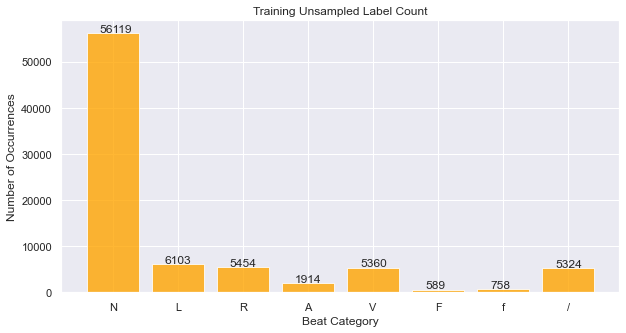

In [12]:
import seaborn as sns
sns.set()
feature_names = ['N','L','R','A','V','F','f','/']

dftrain = pd.DataFrame(train[:,:-2])
print(dftrain.shape)
countstrain = dftrain[256].value_counts()

plt.figure(figsize=(10,5))
barplt = plt.bar(countstrain.index, countstrain.values, alpha=0.8, color='orange')
plt.title('Training Unsampled Label Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Beat Category', fontsize=12)
plt.xticks(ticks=[1,2,3,4,5,6,7,8],labels=feature_names)
for bar in barplt:
    yval = bar.get_height()
    plt.text(bar.get_x()+.2, yval+200, yval)
plt.show()

## Naive Resampling for Generative Model training

In [13]:
import sklearn.utils as slu
seed=42
np.random.seed(seed)
def downsample(arr,n,seed):
    downsampled = slu.resample(arr,replace=False,n_samples=n,random_state=seed)
    return downsampled

def upsample(arr,n,seed):
    upsampled = slu.resample(arr,replace=True,n_samples=n,random_state=seed)
    return upsampled

In [14]:
anno = train[:,-3]
normal = train[anno == 1.0]
lbbb = train[anno == 2.0]
rbbb = train[anno == 3.0]
apb = train[anno == 4.0]
pvc = train[anno == 5.0]
fvn = train[anno == 6.0]
fpn = train[anno == 7.0]
paced = train[anno == 8.0]

abnormal = [lbbb,rbbb,apb,pvc,fvn,fpn,paced]
list_len = [len(i) for i in abnormal]
print(list_len)

all_classes = [normal,lbbb,rbbb,apb,pvc,fvn,fpn,paced]

num_of_vals = np.mean(list_len, dtype=int)
print(num_of_vals)

sampled_data = []
for i in all_classes:
    if i.shape[0] > num_of_vals:
        i = downsample(i, num_of_vals,seed)
    elif i.shape[0] < num_of_vals:
        i = upsample(i, num_of_vals,seed)
    sampled_data.append(i)


sampled_data = np.concatenate(sampled_data)
# print(sampled_data[0])
np.random.shuffle(sampled_data)
print(sampled_data.shape)

[6103, 5454, 1914, 5360, 589, 758, 5324]
3643
(29144, 259)


(29144, 257)


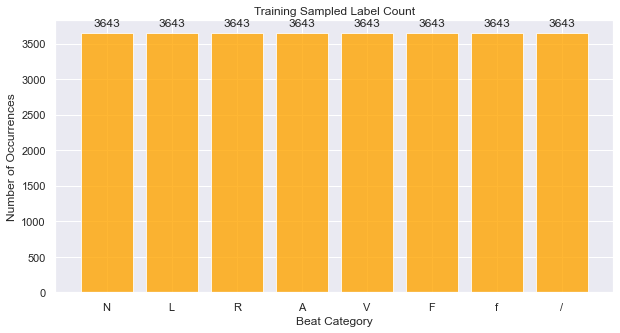

In [15]:
import seaborn as sns
sns.set()
feature_names = ['N','L','R','A','V','F','f','/']

dftrain = pd.DataFrame(sampled_data[:,:-2])
print(dftrain.shape)
countstrain = dftrain[256].value_counts()

plt.figure(figsize=(10,5))
barplt = plt.bar(countstrain.index, countstrain.values, alpha=0.8, color='orange')
plt.title('Training Sampled Label Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Beat Category', fontsize=12)
plt.xticks(ticks=[1,2,3,4,5,6,7,8],labels=feature_names)
for bar in barplt:
    yval = bar.get_height()
    plt.text(bar.get_x()+.2, yval+100, yval)
plt.show()

In [16]:
if not os.path.exists('./train_test_sampled_mlii/'):
    os.makedirs('./train_test_sampled_mlii/')
train_samp_file = './train_test_sampled_mlii/train_mlii.csv'
test_samp_file = './train_test_sampled_mlii/test_mlii.csv'

with open(train_samp_file, 'wb') as f:
    np.savetxt(f, sampled_data, delimiter=",", fmt='%f')

with open(test_samp_file, 'wb') as f:
    np.savetxt(f, test, delimiter=",", fmt='%f')

In [17]:
train_samp = np.loadtxt('./train_test_sampled_mlii/train_mlii.csv', delimiter=',')
test_samp = np.loadtxt('./train_test_sampled_mlii/test_mlii.csv', delimiter=',')

print(train_samp.shape)
print(test_samp.shape)

(29144, 259)
(27207, 259)
